# Machine Learning Pipelines for an Automated Spam Filter

## Introduction

## 1. Dataset and Libraries

### Importing libraries

In [2]:
#TNM 03032021
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

### Loading the dataset

In [3]:
dataset=pd.read_csv('SMSSpamCollection', sep='\t') # Loads the dataset into a dataframe
#Take note that dataset is tab separated,hence the option sep='\t'

## 2. Exploratory Data Analysis (EDA)

We carry out an Exploratory Data Analysis exercise to provide a bird's view of the main characteristics of the datset. 

In [4]:
dataset.head() #A snippet of the first five rows of the dataset. 

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset.isnull().sum() #Checking for missing values. This returns the number of missing values per column.

labels     0
message    0
dtype: int64

In [6]:
dataset.describe() #Provides basic statistics of each column i.e Value count, Unique values count, Top frequency value etc

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset.groupby("labels").describe() #Provides basic statistics of the 'labels' variable

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

We now make a new column (feature) to detect how long the text messages are.

In [8]:
dataset["length"]=dataset["message"].apply(len) #Appends a 'length' feature to our dataframe.
dataset.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Let's visualize the length of the messages and compute some basic statistics thereafter. 

<AxesSubplot:ylabel='Frequency'>

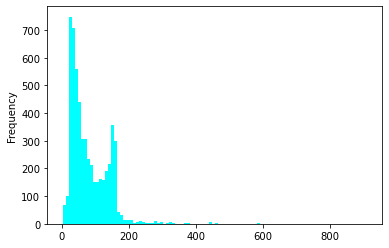

In [9]:
dataset['length'].plot(bins=100, kind='hist', color='cyan') 

In [10]:
dataset.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Interestingly there is a whole message with a whooping 910 characters!! while the shortest message has only two characters... Lets identify them.

In [11]:
long_sms=dataset[dataset["length"]==910]["message"].iloc[0]
print('Long SMS=>', long_sms)
print('****************************************************************************************')
short_sms=dataset[dataset["length"]==2]["message"].iloc[0]
print('Short SMS=>',short_sms)

Long SMS=> For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..
******************************************************************************

#### Class Balancing Check

A quick pie chart plot with the respective pie percentages will do!

<AxesSubplot:ylabel='labels'>

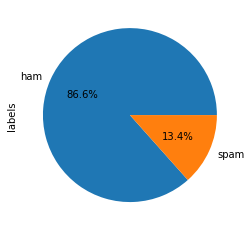

In [12]:
dataset["labels"].value_counts().plot.pie(autopct='%1.1f%%')

#### A plot of the length variable against the Target Variable classes


We visualize the message objects to see if message length is a distinguishing feature between ham and spam.

<AxesSubplot:xlabel='labels', ylabel='length'>

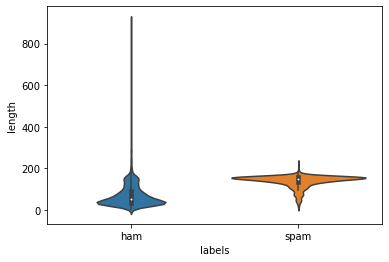

In [13]:
dataset_viz = dataset.copy()
sns.violinplot(x="labels", y="length", data=dataset_viz)

#### Word Clouds for Ham and Spam messages

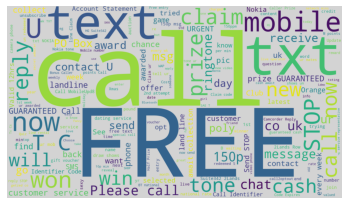

In [14]:
spamtext=""
for text in dataset["message"][dataset["labels"]=="spam"]:
    spamtext+=text

spamcloud=WordCloud(background_color='lightgrey',colormap='viridis', width=1400, height=800 ).generate(spamtext)
plt.figure()
plt.imshow(spamcloud)
plt.axis("off")
plt.show()

The wordcloud gives us an idea on the frequency of words in the spam messages. The words; FREE, Call, txt, text, won, claim, now, mobile, TC, reply, and prize are the most frequent in spam messages. 

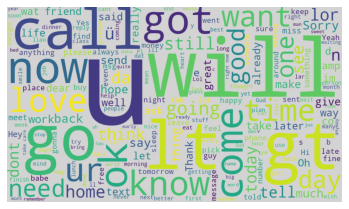

In [15]:
hamtext=""
for text in dataset["message"][dataset["labels"]=="ham"]:
    hamtext+=text

hamcloud=WordCloud(background_color='lightgrey',colormap='viridis', width=1200, height=700 ).generate(hamtext)

plt.figure()
plt.imshow(hamcloud)
plt.axis("off")
plt.show()


## 3. Data Pre-processing

#### Feature Matrix and Target Varibale

First we first create a matrix of features and target variable vector. 

In [16]:
X=dataset["message"] 
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


In [17]:
y=dataset["labels"]
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object


#### Spliting the Data into Training and Test Sets

Let's go ahead to split the data into a Training set on which Machine Learning classifiers will learn and a Test set that will be used to evaluate how good a particular model classifies unseen messages to either "Ham" or "Spam".

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.25, random_state=42, stratify=y)

### Feature Extraction

In the recent times, text Analysis is a popular task in ML and its advancements in NLP and Computer Vision. However, we can not feed texts (words) directly into the  Machine Learning or Deep Learning models as the algorithms work on numbers. In this section we'll convert the raw messages (sequence of characters) into vectors of numbers in order to extract and produce feature representations that are appropriate for the type of NLP task that we will carry out. 

First,we will make use of the resourceful NLTK library to create a preprocessor that will carryout such exercises as;
1. Convert all text to lowecase
2. Remove all punctuactions
3. Excecute lemmatization/stemming of words

#### Importing the necessary helpers

In [19]:
import re #for regular expressions operations. A sequence of characters that forms a search pattern.
from nltk.stem.porter import PorterStemmer

#### Creating the preprocessor object

In [20]:
porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

#### Vectorization and weighting

We carry out feature extraction using Term frequency-Inverse document frequency (TF-IDF) Vectorizer. The TF-IDF  is based on the Bag of Words (BoW) model, which contains insights about the less relevant and more relevant words in a document. The TF-IDF value increases proportionally to the number of times a word appears in the document (TF) and is offset by the number of documents in the corpus that contain the word (IDF), which helps to adjust for the fact that some words appear more frequently in general e.g stop words. Therefore, The TF-IDF Vectorizer does both corpus vectorization and weighting to give more weightage to the words/tokens that are rare. 

#### Importing the TF-IDF Vectorizer and fitting and/or transforming it to our partioned feature matrix

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(tokenizer=stemming_tokenizer) #We use our previously constructed preprocessor as our tokenizer
X_train_tfidf=tfidf_vect.fit_transform(X_train) 
X_test_tfidf=tfidf_vect.transform(X_test)

## 4. Learning Classifiers

In this section different machine learning models spanning from probabilistic, non-probabilistic, to instance-based learners will be fitted and optimized through GridSearch Cross-Validation process. A full Classification report is generated, alongside a Confusion matrix, Accuracy score of the test set and the average Accuracy score across all cross-validations as well as the best Hyper-parameter value(s) that optimize the model. 

#### Importing Classifiers

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,average_precision_score, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### a) Logistic Regression Classifier - (Grid Search Cross-Validation)

In [23]:
parameters={'C':[0.1,0.5, 1,3,5,10]}
logistic_clf=GridSearchCV(LogisticRegression(penalty='l2', random_state=0), parameters, cv=10, n_jobs=-1, verbose=1 )
logistic_clf.fit(X_train_tfidf, y_train)
LG_pred = logistic_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, LG_pred)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, LG_pred)*100))
print (classification_report(y_test, LG_pred))
best_accuracy = logistic_clf.best_score_
best_parameters =logistic_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[[1206    0]
 [  13  174]]
Accuracy:99.07 %
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1206
        spam       1.00      0.93      0.96       187

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

Best Accuracy: 98.23 %
Best Parameters: {'C': 10}


#### b) Support Vector  Classifier - (Grid Search Cross-Validation)

In [24]:
parameters={'C':[0.001, 0.01,1,10], 'gamma':[0.1,0.5,1,3,5]}
#In this model, the l2 norm is implied
svc_clf=GridSearchCV(SVC(kernel = 'rbf', random_state = 42), parameters, cv=10, n_jobs=-1, verbose=1 )
svc_clf.fit(X_train_tfidf, y_train)
SVC_pred = svc_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, SVC_pred)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, SVC_pred)*100))
print (classification_report(y_test, SVC_pred))
best_accuracy = svc_clf.best_score_
best_parameters = svc_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[[1205    1]
 [  10  177]]
Accuracy:99.21 %
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1206
        spam       0.99      0.95      0.97       187

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

Best Accuracy: 98.47 %
Best Parameters: {'C': 10, 'gamma': 0.1}


#### c) Multinomial Naive Bayes' Classifier

In [25]:
mnbayes_clf=MultinomialNB()
mnbayes_clf.fit(X_train_tfidf, y_train)
MNB_pred = mnbayes_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, MNB_pred)
print(cm)
accuracy=accuracy_score(y_test, MNB_pred)
print (classification_report(y_test, MNB_pred))
print('Best Accuracy', np.round((accuracy),4)*100, '%')

[[1206    0]
 [  59  128]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1206
        spam       1.00      0.68      0.81       187

    accuracy                           0.96      1393
   macro avg       0.98      0.84      0.89      1393
weighted avg       0.96      0.96      0.95      1393

Best Accuracy 95.76 %


#### d) Decison Tree Classifier - (Grid Search Cross-Validation)

In [26]:
parameters={'max_depth':np.arange(2,25)}
dtree_clf=GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state=0), parameters, cv=10, n_jobs=-1, verbose=1 )
dtree_clf.fit(X_train_tfidf, y_train)
DT_pred = dtree_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, DT_pred)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, DT_pred)*100))
print (classification_report(y_test, DT_pred))
best_accuracy = dtree_clf.best_score_
best_parameters = dtree_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 23 candidates, totalling 230 fits
[[1199    7]
 [  37  150]]
Accuracy:96.84 %
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1206
        spam       0.96      0.80      0.87       187

    accuracy                           0.97      1393
   macro avg       0.96      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Best Accuracy: 96.96 %
Best Parameters: {'max_depth': 21}


#### e) K-Nearest Neighbor Classifier - (GridSearch Cross-Validation)

In [27]:
parameters={'n_neighbors':np.arange(1,10,2)}

knn_clf=GridSearchCV(KNeighborsClassifier(algorithm='auto', weights='uniform', metric='minkowski',p=2 ), parameters, cv=10, n_jobs=-1, verbose=1 )
knn_clf.fit(X_train_tfidf, y_train)
KNN_pred = knn_clf.predict(X_test_tfidf)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, KNN_pred)*100))
print (classification_report(y_test, KNN_pred))
best_accuracy = knn_clf.best_score_
best_parameters = knn_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[[1199    7]
 [  37  150]]
Accuracy:97.13 %
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.98      0.80      0.88       187

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Best Accuracy: 96.87 %
Best Parameters: {'n_neighbors': 5}


#### f) Random Forest Classifier - (Grid Search Cross-Validation)

In [28]:
parameters={'n_estimators': np.arange(10,100,5)}
rforest_clf=GridSearchCV(RandomForestClassifier(criterion='gini', random_state=0), parameters, cv=10, n_jobs=-1, verbose=1)
rforest_clf.fit(X_train_tfidf, y_train)
RF_pred = rforest_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, RF_pred)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, RF_pred)*100))
print (classification_report(y_test, RF_pred))
best_accuracy = rforest_clf.best_score_
best_parameters = rforest_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[[1206    0]
 [  36  151]]
Accuracy:97.42 %
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       1.00      0.81      0.89       187

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Best Accuracy: 98.09 %
Best Parameters: {'n_estimators': 65}


#### g) AdaBoost Classifier  - (GridSearch Cross-Validation)

In [29]:
parameters={'n_estimators': range(30,101,5),'learning_rate':[.5,1,2]}
adaboost_clf=GridSearchCV(AdaBoostClassifier(random_state=0), parameters, cv=10, n_jobs=-1, verbose=1)
adaboost_clf.fit(X_train_tfidf, y_train)
ADAB_pred = adaboost_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, ADAB_pred)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, ADAB_pred)*100))
print (classification_report(y_test, ADAB_pred))
best_accuracy = adaboost_clf.best_score_
best_parameters = adaboost_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[[1200    6]
 [  26  161]]
Accuracy:97.70 %
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.96      0.86      0.91       187

    accuracy                           0.98      1393
   macro avg       0.97      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Best Accuracy: 98.04 %
Best Parameters: {'learning_rate': 1, 'n_estimators': 95}


#### h) XGBoost Classifier - (Grid Search Cross-Validation)

In [30]:
parameters={'learning_rate':[.5,1], 'gamma':[0,.5,1],
             'reg_lambda':[5,10],'scale_pos_weight': [1,3,5]}
xgb_clf=GridSearchCV(XGBClassifier( objective= 'binary:logistic',subsample=.9,random_state=42), 
                 parameters, cv=10, n_jobs=-1, verbose=1)
xgb_clf.fit(X_train_tfidf, y_train)
XGB_pred = xgb_clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, XGB_pred)
print(cm)
print("Accuracy:{:.2f} %".format(accuracy_score(y_test, XGB_pred)*100))
print (classification_report(y_test, XGB_pred))
best_accuracy = xgb_clf.best_score_
best_parameters = xgb_clf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\Mutunga\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1199    7]
 [  22  165]]
Accuracy:97.92 %
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1206
        spam       0.96      0.88      0.92       187

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Best Accuracy: 98.01 %
Best Parameters: {'gamma': 0.5, 'learning_rate': 0.5, 'reg_lambda': 5, 'scale_pos_weight': 5}


## 5. Classification ML Pipelines

In this section, we create a Pipeline of Machine Learning workflow for each classifier. The Pipelines allow for an ensemble of all the ransformations carried out on the data for future use.

#### Importing the Pipeline tool 

In [31]:
from sklearn.pipeline import Pipeline

#### Creating Pipelines with the necessary transformations on board for each model

### a) Logistic Regression Classifier - GridSearchCV

In [32]:
pipe_lg = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('logistic_clf', LogisticRegression(penalty='l2', random_state=0)),])

parameters={'logistic_clf__C':[0.1,0.5, 1,3,5,10]} 

gridcv_LG = GridSearchCV(pipe_lg, param_grid=parameters, cv=10,
                        n_jobs=-1, verbose=1)

Pipe_LG=gridcv_LG.fit(X=X_train,y= y_train)

LG_pred =gridcv_LG.predict(X_test)
cm = confusion_matrix(y_test, LG_pred)
print(cm)

Acc_LG =np.round(accuracy_score(y_test, LG_pred),4)*100

print('Predictions:', LG_pred)
print(classification_report(LG_pred,y_test))
print('Accuracy Score:', Acc_LG,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_LG.best_score_*100),'%')
print("Best Parameters:", gridcv_LG.best_params_)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[[1206    0]
 [  13  174]]
Predictions: ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1219
        spam       0.93      1.00      0.96       174

    accuracy                           0.99      1393
   macro avg       0.97      0.99      0.98      1393
weighted avg       0.99      0.99      0.99      1393

Accuracy Score: 99.07000000000001 %
Best Cross-Validation Accuracy Score: 98.59 %
Best Parameters: {'logistic_clf__C': 10}


### b) Support Vector Classifier - GridSearchCV

In [33]:
pipe_svc = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('svc_clf', SVC(kernel = 'rbf', random_state = 42))])

parameters={'svc_clf__C':[0.001, 0.01,1,10], 'svc_clf__gamma':[0.1,0.5,1,3,5]}

gridcv_SVC = GridSearchCV(pipe_svc, parameters, cv=10,
                        n_jobs=-1, verbose=1)
Pipe_SVC=gridcv_SVC.fit(X=X_train,y= y_train)

SVC_pred =gridcv_SVC.predict(X_test)

Acc_SVC =np.round(accuracy_score(y_test, SVC_pred),4)*100

print('Predictions:', SVC_pred)
print(classification_report(SVC_pred,y_test))
print('Accuracy Score:', Acc_SVC,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_SVC.best_score_*100),'%')
print("Best Parameters:", gridcv_SVC.best_params_)

prediction1=Pipe_SVC.predict(["Hi, how are you doing today?"])
print(prediction1)

prediction2=Pipe_SVC.predict(["Hello, Win! Win! Win!, Free tickects worth Ksh. 10,000. Call this number 12345 to claim your prize"])
print(prediction2)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Predictions: ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      1215
        spam       0.95      0.99      0.97       178

    accuracy                           0.99      1393
   macro avg       0.97      0.99      0.98      1393
weighted avg       0.99      0.99      0.99      1393

Accuracy Score: 99.21 %
Best Cross-Validation Accuracy Score: 98.78 %
Best Parameters: {'svc_clf__C': 10, 'svc_clf__gamma': 0.1}
['ham']
['spam']


### c) MultiNomial Naive Bayes' Classifier - GridSearchCV

In [34]:
pipe_mnb=Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('clf', MultinomialNB()),])
Pipe_MNB=pipe_mnb.fit(X=X_train,y= y_train)
MNB_pred =pipe_mnb.predict(X_test)
Acc_MNB =np.round(accuracy_score(y_test, MNB_pred),4)*100
print('Predictions:', MNB_pred)
print(classification_report(MNB_pred,y_test))
print('Accuracy_Score:', Acc_MNB,'%')

predictions=Pipe_MNB.predict(["Hi how are you doing today?"])
print(predictions)

Predictions: ['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1265
        spam       0.68      1.00      0.81       128

    accuracy                           0.96      1393
   macro avg       0.84      0.98      0.89      1393
weighted avg       0.97      0.96      0.96      1393

Accuracy_Score: 95.76 %
['ham']


### d) Decision Tree Classifier-GridSearchCV

In [35]:
pipe_dtree = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('dtree_clf', DecisionTreeClassifier(criterion='gini',random_state=0))])

parameters={'dtree_clf__max_depth':np.arange(2,25)}

gridcv_DT = GridSearchCV(pipe_dtree, parameters, cv=10,
                        n_jobs=-1, verbose=1)
Pipe_DT=gridcv_DT.fit(X=X_train,y= y_train)

DT_pred =gridcv_DT.predict(X_test)

Acc_DT =np.round(accuracy_score(y_test, DT_pred),4)*100

print('Predictions:', DT_pred)
print(classification_report(DT_pred,y_test))
print('Accuracy Score:', Acc_DT,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_DT.best_score_*100),'%')
print("Best Parameters:", gridcv_DT.best_params_)

Fitting 10 folds for each of 23 candidates, totalling 230 fits
Predictions: ['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1240
        spam       0.79      0.96      0.86       153

    accuracy                           0.97      1393
   macro avg       0.89      0.96      0.92      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy Score: 96.7 %
Best Cross-Validation Accuracy Score: 96.51 %
Best Parameters: {'dtree_clf__max_depth': 24}


#### e) K-Nearest Neighbor Classifier - GridSearchCV

In [36]:
pipe_knn = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('knn_clf', KNeighborsClassifier(algorithm='auto', weights='uniform', metric='minkowski',p=2))])

parameters={'knn_clf__n_neighbors':np.arange(1,10,2)}

gridcv_KNN = GridSearchCV(pipe_knn, parameters, cv=10,
                        n_jobs=-1, verbose=1)
Pipe_KNN=gridcv_KNN.fit(X=X_train,y= y_train)

KNN_pred =gridcv_KNN.predict(X_test)

Acc_KNN =np.round(accuracy_score(y_test, KNN_pred),4)*100

print('Predictions:', KNN_pred)
print(classification_report(KNN_pred,y_test))
print('Accuracy Score:', Acc_KNN,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_KNN.best_score_*100),'%')
print("Best Parameters:", gridcv_KNN.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Predictions: ['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1243
        spam       0.80      0.99      0.88       150

    accuracy                           0.97      1393
   macro avg       0.90      0.98      0.93      1393
weighted avg       0.98      0.97      0.97      1393

Accuracy Score: 97.2 %
Best Cross-Validation Accuracy Score: 96.87 %
Best Parameters: {'knn_clf__n_neighbors': 5}


### f) Random Forest Classifier - GridSearchCV

In [37]:
pipe_rforest = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('rforest_clf', RandomForestClassifier(criterion='gini', random_state=0))])

parameters={'rforest_clf__n_estimators': np.arange(10,100,5)}

gridcv_RF = GridSearchCV(pipe_rforest, parameters, cv=10,
                        n_jobs=-1, verbose=1)
Pipe_RF=gridcv_RF.fit(X=X_train,y= y_train)

RF_pred =gridcv_RF.predict(X_test)

Acc_RF =np.round(accuracy_score(y_test, RF_pred),4)*100

print('Predictions:', RF_pred)
print(classification_report(RF_pred,y_test))
print('Accuracy Score:', Acc_RF,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_RF.best_score_*100),'%')
print("Best Parameters:", gridcv_RF.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Predictions: ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      1241
        spam       0.81      1.00      0.90       152

    accuracy                           0.97      1393
   macro avg       0.91      0.99      0.94      1393
weighted avg       0.98      0.97      0.98      1393

Accuracy Score: 97.49 %
Best Cross-Validation Accuracy Score: 98.01 %
Best Parameters: {'rforest_clf__n_estimators': 35}


### g) AdaBoost Classifier - GridSearchCV

In [38]:
pipe_adaboost = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('adaboost_clf', AdaBoostClassifier(random_state=42))])

parameters={'adaboost_clf__n_estimators': range(30,101,5),'adaboost_clf__learning_rate':[.5,1,2]}

gridcv_ADAB = GridSearchCV(pipe_adaboost, parameters, cv=10,
                        n_jobs=-1, verbose=1)
Pipe_ADAB=gridcv_ADAB.fit(X=X_train,y= y_train)

ADAB_pred =gridcv_ADAB.predict(X_test)

Acc_ADAB =np.round(accuracy_score(y_test, ADAB_pred),4)*100

print('Predictions:', ADAB_pred)
print(classification_report(ADAB_pred,y_test))
print('Accuracy Score:', Acc_ADAB,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_ADAB.best_score_*100),'%')
print("Best Parameters:", gridcv_ADAB.best_params_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
Predictions: ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1228
        spam       0.86      0.97      0.91       165

    accuracy                           0.98      1393
   macro avg       0.93      0.97      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy Score: 97.7 %
Best Cross-Validation Accuracy Score: 97.97 %
Best Parameters: {'adaboost_clf__learning_rate': 1, 'adaboost_clf__n_estimators': 75}


### h) XGBoost Classifier- GridSearch CV

In [39]:
pipe_xgb = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer=stemming_tokenizer)),
         ('xgb_clf',XGBClassifier(objective= 'binary:logistic',subsample=.9,random_state=0))])

parameters={'xgb_clf__learning_rate':[.5,1], 'xgb_clf__gamma':[0,.5,1],
             'xgb_clf__reg_lambda':[5,10],'xgb_clf__scale_pos_weight': [1,3,5]} #The last Balances -ve and +ves weighting in seperate rounds 

gridcv_XGB = GridSearchCV(pipe_xgb, parameters, cv=10,
                        n_jobs=-1, verbose=1)
Pipe_XGB=gridcv_XGB.fit(X=X_train,y= y_train)

XGB_pred =gridcv_XGB.predict(X_test)

Acc_XGB =np.round(accuracy_score(y_test, XGB_pred),4)*100

print('Predictions:', XGB_pred)
print(classification_report(XGB_pred,y_test))
print('Accuracy Score:', Acc_XGB,'%')
print("Best Cross-Validation Accuracy Score: {:.2f}".format(gridcv_XGB.best_score_*100),'%')
print("Best Parameters:", gridcv_XGB.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\Mutunga\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predictions: ['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1225
        spam       0.87      0.96      0.91       168

    accuracy                           0.98      1393
   macro avg       0.93      0.97      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy Score: 97.77 %
Best Cross-Validation Accuracy Score: 97.92 %
Best Parameters: {'xgb_clf__gamma': 0, 'xgb_clf__learning_rate': 0.5, 'xgb_clf__reg_lambda': 5, 'xgb_clf__scale_pos_weight': 3}


### 6.  Results Comparison and Conclusion

In [40]:
classifiers=['Logistic:','SVC:','MNB:', 'DTree:','K-NN:','RForest:','AdaBoost:','XGBoost:'] #list of classifers
list_pred =[LG_pred, SVC_pred, MNB_pred, DT_pred,
            KNN_pred, RF_pred, ADAB_pred, XGB_pred] #list of predictios
dict_pred = dict(zip(classifiers, list_pred)) #dictionary of predictions per classifier

In [41]:
dict_acc = {}
for clf in classifiers:
    dict_acc[clf] = accuracy_score(y_test, dict_pred[clf])
for clf in classifiers:
    print(clf, " " , np.round(dict_acc[clf],4)*100, '%')

Logistic:   99.07000000000001 %
SVC:   99.21 %
MNB:   95.76 %
DTree:   96.7 %
K-NN:   97.2 %
RForest:   97.49 %
AdaBoost:   97.7 %
XGBoost:   97.77 %


From the Accuracy scores above, The Support Vector Classifier emergences the winner while the Logistc regression Classifier comes in close second. The K-NN and Ensemble learners have equally good scores while Decison trees and the Multinomial Naive Bayes were the least performing.

However, since the data is highly imbalanced,  the Accuracy score which is simply the proportion of correct predictions over the total predictions is not an ideal measure to use. Imbalanced classification problems typically rate classification errors with the minority class as more important than those with the majority class. 

As a matter of fact, in our case the minority class (positives) is of great importance. We therefore need consider an alternative metric that focuses on the minority class such as; The Precison-Recall score. 

#### Precison-Recall Area Under Curve (PR-Curve) and score

Ordered Classifiers: ['Logistic', 'SVC', 'MNB', 'DTree', 'K-NN', 'RForest', 'AdaBoost', 'XGBoost']


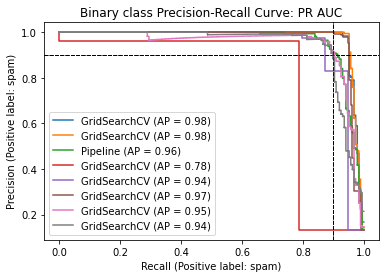

In [45]:
classifiers_names=['Logistic','SVC','MNB', 'DTree','K-NN','RForest','AdaBoost','XGBoost']

learners=[Pipe_LG,Pipe_SVC,Pipe_MNB,Pipe_DT,Pipe_KNN,Pipe_RF,Pipe_ADAB,Pipe_XGB]
fig, ax = plt.subplots()
for l in learners:
    plot_precision_recall_curve(l, X_test, y_test, ax=ax)
    ax.axhline(0.9, c='k', ls="--", lw=1, alpha=0.5)
    ax.axvline(0.9, c='k', ls="--", lw=1, alpha=0.5)
    ax.set_title("Binary class Precision-Recall Curve: PR AUC")
print('Ordered Classifiers:',classifiers_names)

This plot presents the different Areas Under Curve for the list classifiers with the corresponding AP Scores. Generally, the higher the PR-AUC score, the better a classifier performs for the given task. One way to measure the Precion Recall score is to find average precision (AP). According to the Sklearn documentation, AP is the weighted mean of precision achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

In our case we set a cap threshold of 0.9 for both recall and precison scores. All number of classifiers beat this thresholds other than the Decision Trees classifier (in red).
The SVM and Logistic Regression classifiers are the best performing in this case the latter beating the former slighltly. The Random Forest classifier comes in second followed by the Multinomial Naive Bayes. The the K-NN algorithm and boosted ensemble learners perform more or less the same with AdaBoost having a slight edge over the rest. Decision Trees classifier is the worst performing.  

In [42]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False) 
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [43]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    
    classifiers = list(dict_all_pred.keys())
    plt.figure(figsize=(10,7.5))
    plt.suptitle(str_title, fontsize=20, fontweight='bold')
    n=331

    for clf in classifiers : 
        plt.subplot(n)
        plot_confusion_matrix(y_true, dict_all_pred[clf])
        plt.title(clf, fontweight='bold')
        n+=1

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

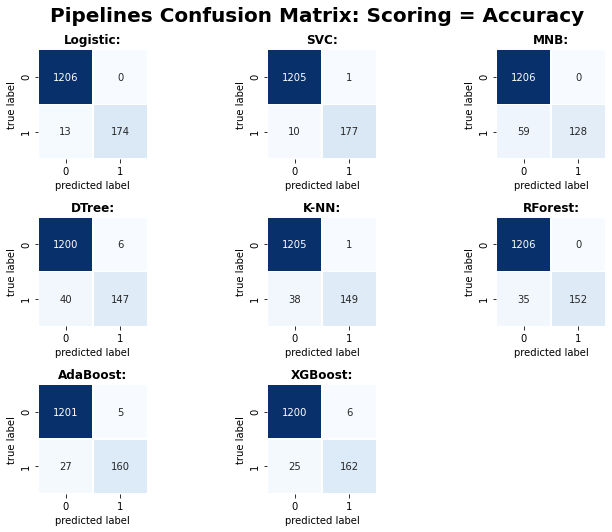

In [44]:
 plot_all_confusion_matrices(y_test, dict_pred, "Pipelines Confusion Matrix: Scoring = Accuracy")

#### Conclusion

The evaluation results from  this project point out on the need for an appropriate evaluation metric under any given situation. As the saying goes, "A Machine Learning model is as good as it's evaluation metric". A few observations can be made on the performance results based on the PR-Score.

1. The SVC is fast and highly effective in high dimensional spaces and the option to use an RBF-kernel further compounds  the ability of this classifier to process data that is not linearly separable hence it's astounding performance.

2. The Logistic classifier is a GLM that violets the assumptions of normality, linearlity and constant variance which makes it powerful to fit particular data that is non-linear and do so perfectly well.

3. The Ensemble learners outperform the lone learner Desicion  Trees and this is due to the fact that the ensembling process used weak learners (Descion Trees) as bulding blocks for complex and stronger learners through bagging and boosting. This helps to mitigate against the Bias-Variance trade-off hence resulting in more efficient learners. Furthermore, Over complex Desicion Trees do not generalize well as they  are prone to over-fitting. 